![Cover](https://pbs.twimg.com/media/FTJEh-ZaAAEDKcc?format=jpg&name=medium)

Simple linear regression is a type of regression analysis where the number of independent variables is one and there is a linear relationship between the independent(x) and dependent(y) variable.

[Click to see my article on Linear Regression](https://medium.com/machine-learning-researcher/linear-regression-algorithm-in-machine-learning-87c945019cf1)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Information of Dataset </font>

<b>Salary Dataset:</b> This dataset is have 30 numbers of observation and 2 numbers ofattributes which contains the information of Salary with with respect to Years of Experice <br>

<b> Attribute Information </b> <br>
`Years of Experience:` Numercal (1.1 - 10.5)<br>
`Salary:` Numercal (39343 - 121872)<br>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue> Import the Libraries

In [51]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

#### <font color = blue>Import the Dataset

In [7]:
df = pd.read_csv("Dataset/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Summary and Visualization</font>

#### <font color = blue>Data shape

In [5]:
print("Number of columns:", df.shape[1])
print("Number of rows: ", df.shape[0])

Number of columns: 2
Number of rows:  30


#### <font color = blue>Data Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#### <font color = blue>Data Description

In [9]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


#### <font color = blue> Check the Relationship of Respected Features

<function matplotlib.pyplot.show(close=None, block=None)>

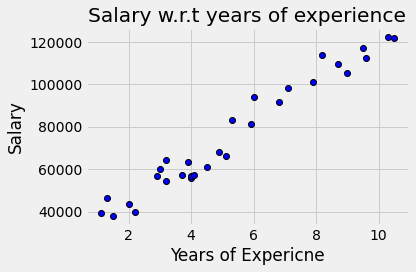

In [20]:
plt.scatter(x = df['YearsExperience'], y = df['Salary'], color = 'blue', edgecolor='black', linewidth=1)

plt.title('Salary w.r.t years of experience')
plt.xlabel('Years of Expericne')
plt.ylabel('Salary')


plt.tight_layout()
plt.show

#### <font color = blue> Check the Correaltion of Features

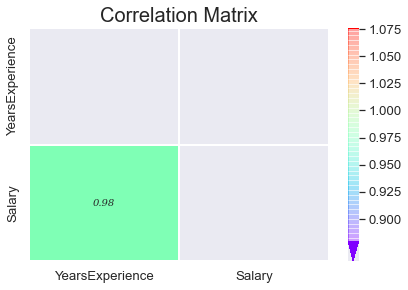

In [22]:
# Define the figure size
#plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Define Predictor and target Attribute </font>

In [23]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

#### <font color = blue> Predictor Attribute

In [24]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


#### <font color = blue> Target Attribute

In [25]:
Y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Dealing with Missing Value </font>

#### <font color = blue> Check the Missing Value

In [26]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### <font color = #27C3E5> 2.4: </font> <font color = #41EA46> Split the Data into Train and Test </font>

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### <font color = blue> Training Data

In [28]:
print("X_test", X_train.shape)
print("X_test", y_train.shape)

X_test (24, 1)
X_test (24,)


#### <font color = blue> Testing Data

In [29]:
print("X_test", X_test.shape)
print("X_test", y_test.shape)

X_test (6, 1)
X_test (6,)


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Build the Linear Regression </font>
In this part, we build Linear Regression Model using Scikit-Learn

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color = blue> Import Model from Sklearn

In [30]:
from sklearn.linear_model import LinearRegression

#### <font color = blue> Initialize the Model

In [31]:
regressor = LinearRegression()

#### <font color = blue> Fit the Model

In [32]:
regressor.fit(X_train, yvv_train)

LinearRegression()

#### <font color = blue> Predict the Test Data</font>

In [36]:
y_pred = regressor.predict(X_test)

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Evaluate the Result </font>
In this part, we evaluate the Linear Regression Model. And for evaluation we will use three metrics. <br>
`R Square`: R Square measures how much variability in dependent variable can be explained by the model. <br>
`Mean Square Error`: MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number. <br>
`Mean Absolute Error`: Mean Absolute Error(MAE) is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error.

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46>  Evaluate the Results </font>

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### <font color = blue>4.2.1: Calculate the Results

In [42]:
# R Square
R_Square = r2_score(y_pred, y_test)
print('R Square:', R_Square) 

# Mean Square Error
MSE = mean_squared_error(y_pred, y_test)
print('Mean Squared Error:', MSE)

# Mean Square Error
MAE = mean_absolute_error(y_pred, y_test)
print('Mean Absolute Error:', MAE)

R Square: 0.986482673117654
Mean Squared Error: 12823412.298126549
Mean Absolute Error: 2446.1723690465055


### <font color = #27C3E5> 4.2: </font> <font color = #41EA46>  Visualize the Predicted Result </font>

<function matplotlib.pyplot.show(close=None, block=None)>

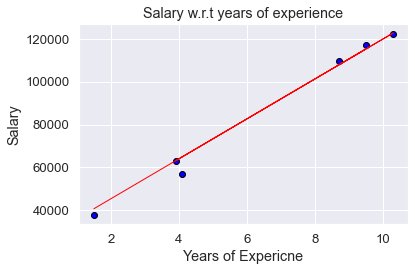

In [46]:
plt.scatter(X_test, y_test, color = 'blue', edgecolor='black', linewidth=1)
plt.plot(X_test, y_pred, color = 'red', linewidth = 1)

plt.title('Salary w.r.t years of experience')
plt.xlabel('Years of Expericne')
plt.ylabel('Salary')


plt.tight_layout()
plt.show

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 5: </font> <font color = #4854E8> Making A Single Prediction </font>
In this part, we make a single Prediction based on new observation

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### <font color = blue>What will be the Salary if Years of Experience is 19

In [53]:
col = ['Years of Experience', 'Salary']
pd.DataFrame([[19, '?']], columns = col)

,Years of Experience,Salary
0,19,?


In [54]:
regressor.predict([[19]])

array([203719.02655848])

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

<b>©</b>Amir Ali